In [6]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random

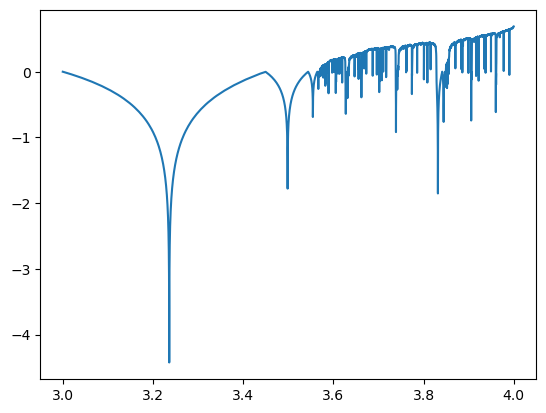

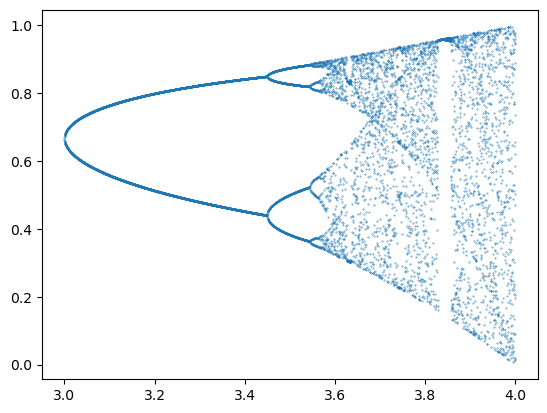

In [42]:
# Feigenbaum_bifurcacion
# Se establece el valor de los parametros
to = 3
N = 4
dt = 0.0001
# Se establecen los valores iniciales de las variables x  e y
x = 0.8
# Se crea el ciclo
r = []
lambda_x1 = []
serie_x1 = []
for a in np.arange(to,N,dt):
    n = 100000
    suma_x = 0
    for i in range(1, n):
        x_mas_1 = a*x*(1-x)
        suma_x += math.log(abs(a*(1-2*x_mas_1)))
        x = x_mas_1
    r.append(a)
    lambda_x1.append(suma_x/n)
    serie_x1.append(x)
plt.plot(r,lambda_x1)
fig, ax = plt.subplots()
ax.scatter(x = r, y = serie_x1, s=0.1)

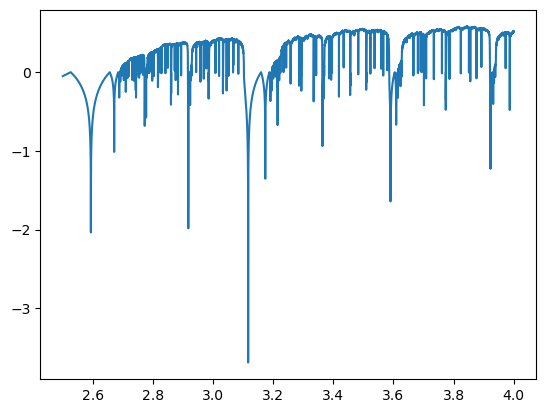

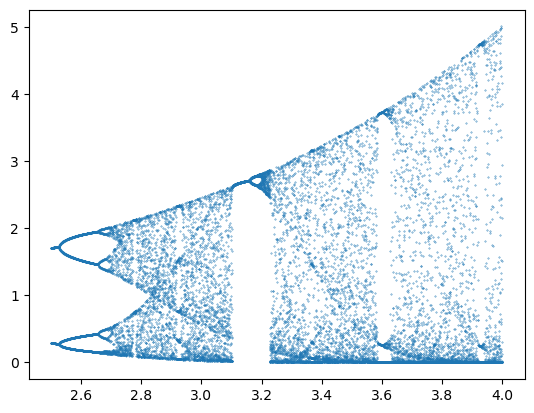

In [43]:
# Feigenbaum_exponencial
# Se establece el valor de los parametros
to = 2.5
N = 4
dt = 0.0001
# Se establecen los valores iniciales de las variables x  e y
x = 0.8
# Se crea el ciclo
r = []
lambda_x2 = []
serie_x2 = []
for a in np.arange(to,N,dt):
    n = 100000
    suma_x = 0
    for i in range(1, n):
        x_mas_1 = x*math.exp(a*(1-x))
        suma_x += math.log(abs((1-a*x)*math.exp(a*(1-x))))
        x = x_mas_1
    r.append(a)
    lambda_x2.append(suma_x/n)
    serie_x2.append(x)
plt.plot(r,lambda_x2)
fig, ax = plt.subplots()
ax.scatter(x = r, y = serie_x2, s=0.1)

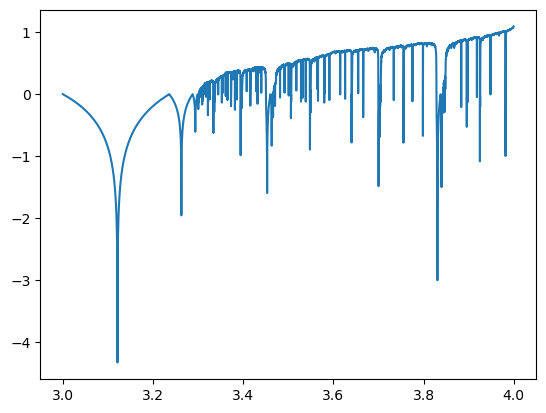

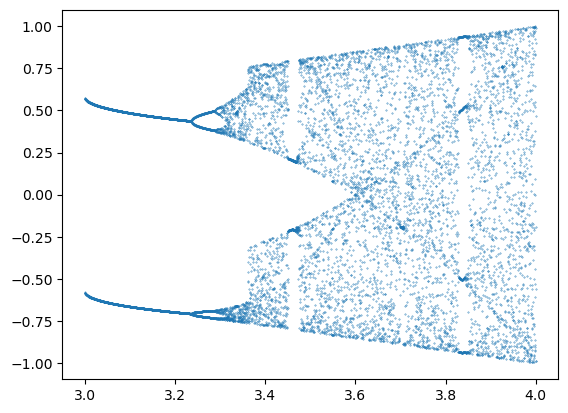

In [41]:
# Feigenbaum_cubica
# Se establece el valor de los parametros
to = 3
N = 4
dt = 0.0001
# Se establecen los valores iniciales de las variables x  e y
x = 0.8
# Se crea el ciclo
r = []
lambda_x3 = []
serie_x3 = []
for a in np.arange(to,N,dt):
    n = 100000
    suma_x = 0
    for i in range(1, n):
        x_mas_1 = x+a*x*(x*x-1)
        suma_x += math.log(abs(1+a*(3*x*x-1)))
        x = x_mas_1
    r.append(a)
    lambda_x3.append(suma_x/n)
    serie_x3.append(x)
plt.plot(r,lambda_x3)
fig, ax = plt.subplots()
ax.scatter(x = r, y = serie_x3, s=0.1)

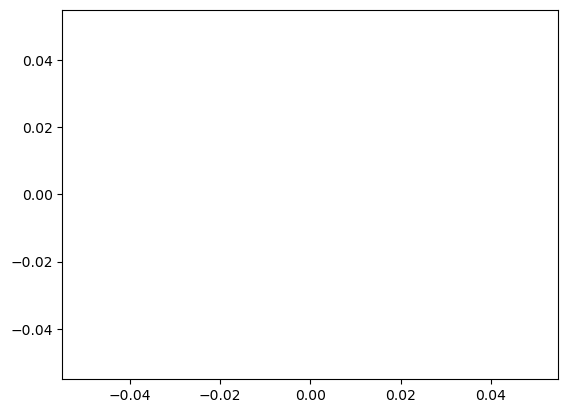

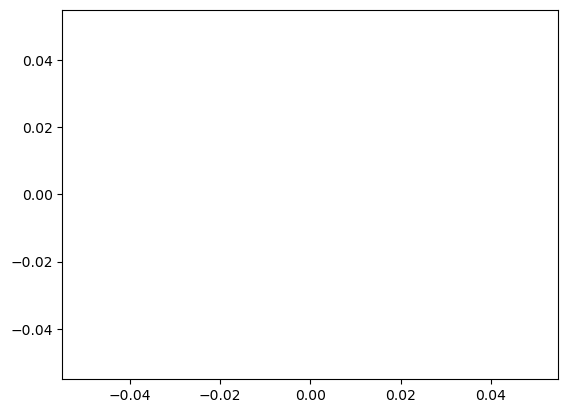

In [22]:
# Feigenbaum_triangular
# Se establece el valor de los parametros
to = 2
N = 1
dt = 0.0001
# Se establecen los valores iniciales de las variables x  e y
x = 0.8
# Se crea el ciclo
r = []
lambda_x = []
serie_x = []
for a in np.arange(to,N,dt):
    n = 100000
    suma_x = 0
    for i in range(n):
        if x < 0.5:
            x_mas_1 = a*x
            suma_x += math.log(abs(1))
            x = x_mas_1
        else:
            x_mas_1 = a*(1-x)
            suma_x += math.log(abs(-a))
            x = x_mas_1
    r.append(a)
    lambda_x.append(suma_x/n)
    serie_x.append(x)
plt.plot(r,lambda_x)
fig, ax = plt.subplots()
ax.scatter(x = r, y = serie_x, s=0.1)

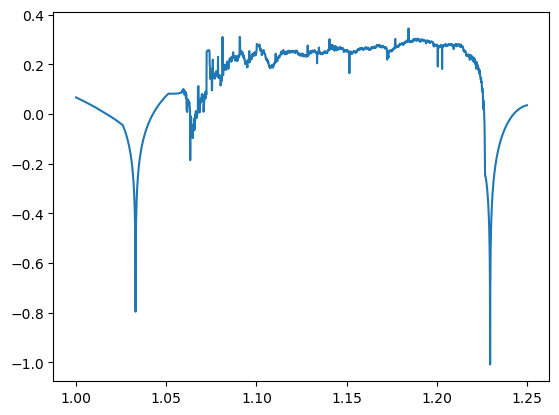

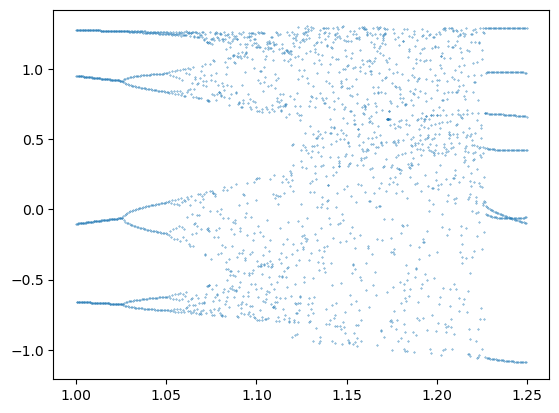

In [44]:
# Henon
# Se establece el valor de los parametros
to = 1
N = 1.25
dt = 0.0001
a = 1.3
b = 0.3
# Se establecen los valores iniciales de las variables x  e y
x = 0.1
y = 0.1
# Se crea el ciclo
r = []
lambda_x5 = []
lambda_y5 = []
serie_x5 = []
serie_y5 = []
for a in np.arange(to,N,dt):
    n = 100000
    suma_x = 0
    suma_y = 0
    for i in range(1, n):
        x_mas_1 = y - a*x*x + 1
        y_mas_1 = b*x
        suma_x += math.log(abs(2*a*x_mas_1))
        suma_y += math.log(abs(2*a*y_mas_1))
        x = x_mas_1
        y = y_mas_1
    r.append(a)
    lambda_x5.append(suma_x/n)
    lambda_y5.append(suma_y/n)
    serie_x5.append(x)
    serie_y5.append(y)
    #print('%.5f' %a,'%.5f' %(suma/n))
plt.plot(r,lambda_x5)
fig, ax = plt.subplots()
ax.scatter(x = r, y = serie_x5, s=0.1)

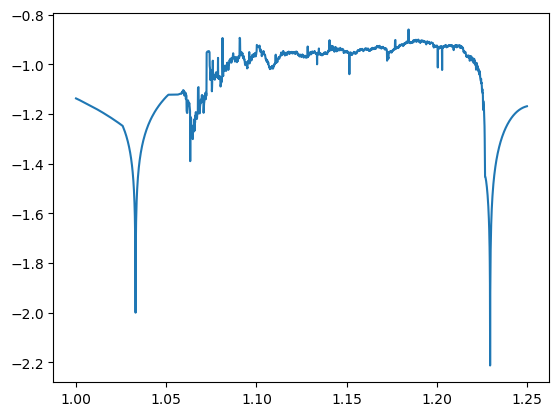

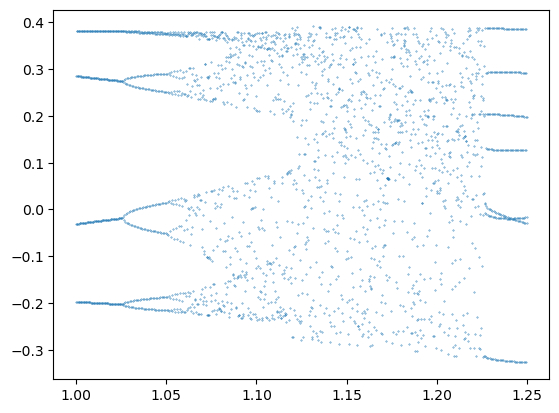

In [45]:
plt.plot(r,lambda_y5)
fig, ax = plt.subplots()
ax.scatter(x = r, y = serie_y5, s=0.1)

In [53]:
def kaplan_yorke_dimension(lyapunov_exponents):
    # Ordenar los exponentes de Lyapunov en orden descendente
    lyapunov_exponents.sort(reverse=True)

    # Encontrar j tal que la suma de los primeros j exponentes es positiva
    # y la suma de los primeros j+1 exponentes es negativa
    sum_lyapunov = 0
    j = 0
    for i, exponent in enumerate(lyapunov_exponents):
        sum_lyapunov += exponent
        if sum_lyapunov < 0:
            j = i
            break

    # Calcular la dimensión de Kaplan-Yorke
    sum_lyapunov -= lyapunov_exponents[j]
    kaplan_yorke_dim = j + sum_lyapunov / abs(lyapunov_exponents[j])

    return kaplan_yorke_dim

# Ejemplo de uso
lyapunov_exponents = lambda_x5
ky_dimension = kaplan_yorke_dimension(lyapunov_exponents)
print(f"La dimensión de Kaplan-Yorke es: {ky_dimension}")

La dimensión de Kaplan-Yorke es: 1007.0396190531688


In [69]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def embed_time_series(time_series, dimension, delay):
    n = len(time_series)
    if n < (dimension - 1) * delay:
        raise ValueError("Time series is too short for the given embedding parameters")
    
    embedded_data = np.array([time_series[i: n - (dimension - 1) * delay + i: delay] for i in range(dimension)]).T
    return embedded_data

def correlation_dimension(time_series, dimension, delay, r_values):
    embedded_data = embed_time_series(time_series, dimension, delay)
    distances = pdist(embedded_data)
    corr_sum = []

    for r in r_values:
        C_r = np.sum(distances < r) / len(distances)
        corr_sum.append(C_r)

    return np.log(r_values), np.log(corr_sum)

def linear_regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m

# Ejemplo de uso
time_series = np.array(serie_y5) #np.random.rand(1000)  # Serie temporal aleatoria (reemplazar con tus datos)
dimension = 3
delay = 1
r_values = np.logspace(-2, 0, num=20)

log_r, log_corr_sum = correlation_dimension(time_series, dimension, delay, r_values)
D2 = linear_regression(log_r, log_corr_sum)

print(f"La dimensión de correlación (Grassberger-Procaccia) es: {D2}")

La dimensión de correlación (Grassberger-Procaccia) es: 1.202084060596295
